In [1]:
import sys
import os
sys.path.append('/home/g007markphillip/language_classification/')
sys.path.append('/home/g007markphillip/language_classification/src')
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


from src.models import *

2022-08-17 23:11:12.170491: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
/home/g007markphillip/anaconda3/envs/tf/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


['/home/g007markphillip/language_classification/notebooks', '/home/g007markphillip/anaconda3/envs/tf/lib/python39.zip', '/home/g007markphillip/anaconda3/envs/tf/lib/python3.9', '/home/g007markphillip/anaconda3/envs/tf/lib/python3.9/lib-dynload', '', '/home/g007markphillip/anaconda3/envs/tf/lib/python3.9/site-packages', '/home/g007markphillip/language_classification/', '/home/g007markphillip/language_classification/src']


In [2]:
new_data = pd.read_csv('../data/processed/processed_3.csv')

In [3]:
new_data

,text,folds,acholi,english,luganda,lumasaba,runyankore,swahili
0,government constructed better health centers r...,0,0,1,0,0,0,0
1,company celebrated twenty years existence last...,0,0,1,0,0,0,0
2,many people have lost their lives sexually tra...,0,0,1,0,0,0,0
3,civil servants receive their pension fund upon...,0,0,1,0,0,0,0
4,teachers also among civil servants,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
174587,cukulwa onongo awano gudu,4,1,0,0,0,0,0
174588,motoka kare medo dwong gudu odiko otyeno,4,1,0,0,0,0,0
174589,okwonge tyeko culo banyane mwaka otum,4,1,0,0,0,0,0
174590,motoka onongo ngwec cipid ogoyo abili doro mot...,4,1,0,0,0,0,0


In [4]:
train_data=new_data[new_data.folds.isin([0,1,2])].reset_index(drop=True)
# train_data=shuffle(train_data).reset_index().drop(columns='index')
val_data = new_data[new_data.folds==3].reset_index().drop(columns='index')
test_data = new_data[new_data.folds==4].reset_index().drop(columns='index')

In [5]:
train_data.text=train_data.text.apply(lambda x:' '.join(['[START]', x, '[END]']))

In [6]:
input_text_processor = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=102544)

2022-08-17 23:11:14.962219: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-08-17 23:11:14.963358: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-08-17 23:11:17.190966: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-17 23:11:17.191732: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2022-08-17 23:11:17.191759: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-08-17 23:11:17.193968: I tensorflow/stream_executor/platform/default/dso_lo

In [7]:
input_text_processor.adapt(train_data.text.values)

input_text_processor.get_vocabulary()[:10]

['',
 '[UNK]',
 'start',
 'end',
 'katika',
 'kuwa',
 'alisema',
 'hiyo',
 'bwana',
 'abantu']

In [8]:
example_input_batch = train_data.text[:50]

example_tokens = input_text_processor(example_input_batch)
example_tokens[:3, :10]

<tf.Tensor: shape=(3, 10), dtype=int64, numpy=
array([[    2,   193,  3865,  1491,   344, 12647,  2869,  1874,     3,
            0],
       [    2,   856,  6434,  5463,  1185,  9578,   957,   526,     3,
            0],
       [    2,   191,    38,    54,  2057,    91,  1770, 12043, 12966,
         1568]])>

Text(0.5, 1.0, 'Mask')

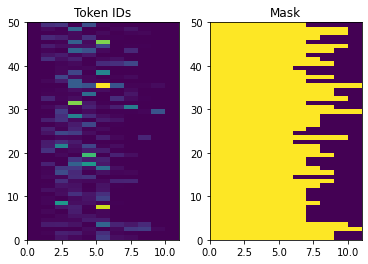

In [9]:
plt.subplot(1, 2, 1)
plt.pcolormesh(example_tokens)
plt.title('Token IDs')

plt.subplot(1, 2, 2)
plt.pcolormesh(example_tokens != 0)
plt.title('Mask')

In [10]:
example_tokens = input_text_processor(example_input_batch)

# Encode the input sequence.
encoder = Encoder(100563,
                  64, 32)
example_enc_output, example_enc_state = encoder(example_tokens)

print(f'Input batch, shape (batch): {example_input_batch.shape}')
print(f'Input batch tokens, shape (batch, s): {example_tokens.shape}')
print(f'Encoder output, shape (batch, s, units): {example_enc_output.shape}')
print(f'Encoder state, shape (batch, units): {example_enc_state.shape}')

2022-08-17 23:11:20.007455: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


Input batch, shape (batch): (50,)
Input batch tokens, shape (batch, s): (50, 11)
Encoder output, shape (batch, s, units): (50, 11, 32)
Encoder state, shape (batch, units): (50, 32)


In [11]:
attention_layer = BahdanauAttention(32)

example_attention_query = tf.random.normal(shape=[len(example_tokens), 2, 10])

# Attend to the encoded tokens
context_vector, attention_weights = attention_layer(
    query=example_attention_query,
    value=example_enc_output,
    mask=(example_tokens != 0))

print(f'Attention result shape: (batch_size, query_seq_length, units):           {context_vector.shape}')
print(f'Attention weights shape: (batch_size, query_seq_length, value_seq_length): {attention_weights.shape}')

Attention result shape: (batch_size, query_seq_length, units):           (50, 2, 32)
Attention weights shape: (batch_size, query_seq_length, value_seq_length): (50, 2, 11)


2022-08-17 23:11:20.460254: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


In [12]:
(example_tokens != 0).shape

TensorShape([50, 11])

Text(0.5, 1.0, 'Mask')

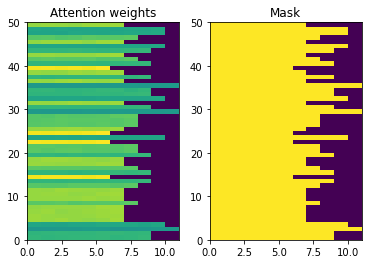

In [13]:
plt.subplot(1, 2, 1)
plt.pcolormesh(attention_weights[:, 0, :])
plt.title('Attention weights')

plt.subplot(1, 2, 2)
plt.pcolormesh(example_tokens != 0)
plt.title('Mask')

In [14]:
attention_weights.shape

TensorShape([50, 2, 11])

<Figure size 432x288 with 0 Axes>

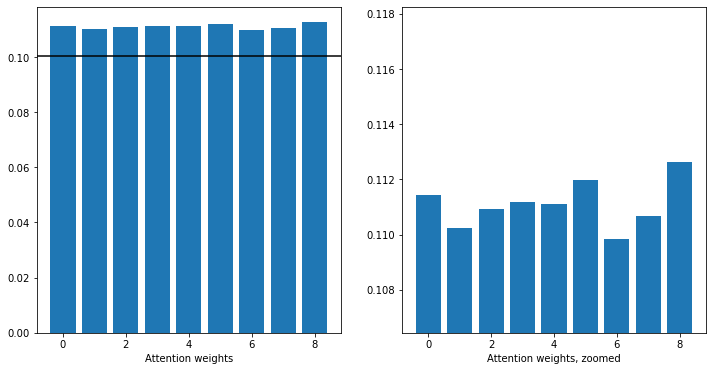

In [15]:
attention_slice = attention_weights[0, 0].numpy()
attention_slice = attention_slice[attention_slice != 0]



plt.suptitle('Attention weights for one sequence')

plt.figure(figsize=(12, 6))
a1 = plt.subplot(1, 2, 1)
plt.bar(range(len(attention_slice)), attention_slice)
# freeze the xlim
plt.xlim(plt.xlim())
plt.xlabel('Attention weights')

a2 = plt.subplot(1, 2, 2)
plt.bar(range(len(attention_slice)), attention_slice)
plt.xlabel('Attention weights, zoomed')

# zoom in
top = max(a1.get_ylim())
zoom = 0.85*top
a2.set_ylim([0.90*top, top])
a1.plot(a1.get_xlim(), [zoom, zoom], color='k')

In [16]:
decoder = Decoder(100563,
                  64,32)

In [17]:
example_output_tokens = input_text_processor(example_input_batch)

start_index = input_text_processor.get_vocabulary().index('start')
first_token = tf.constant([[start_index]] * example_output_tokens.shape[0])

In [18]:
dec_result, dec_state = decoder(
    inputs = DecoderInput(new_tokens=first_token,
                          enc_output=example_enc_output,
                          mask=(example_tokens != 0)),
    state = example_enc_state
)

print(f'logits shape: (batch_size, t, output_vocab_size) {dec_result.logits.shape}')
print(f'state shape: (batch_size, dec_units) {dec_state.shape}')

logits shape: (batch_size, t, output_vocab_size) (50, 1, 100563)
state shape: (batch_size, dec_units) (50, 32)


In [19]:
sampled_token = tf.random.categorical(dec_result.logits[:, 0, :], num_samples=1)


In [20]:
sampled_token

<tf.Tensor: shape=(50, 1), dtype=int64, numpy=
array([[ 82614],
       [ 99250],
       [ 73249],
       [ 57640],
       [  5562],
       [   366],
       [  2359],
       [ 86259],
       [ 67751],
       [ 88183],
       [ 16505],
       [ 60101],
       [ 14500],
       [ 37582],
       [ 90893],
       [ 41259],
       [ 12607],
       [ 97274],
       [ 59703],
       [  5322],
       [ 38417],
       [ 53119],
       [ 28591],
       [ 67704],
       [ 29354],
       [ 33834],
       [  2502],
       [ 39058],
       [ 49234],
       [ 81786],
       [ 11349],
       [ 87777],
       [ 66972],
       [ 48610],
       [ 36210],
       [ 53374],
       [ 55992],
       [ 20794],
       [ 29488],
       [100388],
       [ 27747],
       [ 44118],
       [ 94402],
       [ 23221],
       [ 48709],
       [ 66329],
       [ 31238],
       [ 94179],
       [ 85303],
       [ 52856]])>

In [21]:
vocab = np.array(input_text_processor.get_vocabulary())
first_word = vocab[sampled_token.numpy()]
first_word[:5]

array([['geerro'],
       ['abeeyita'],
       ['layom'],
       ['tonnawasa'],
       ['kufutwa']], dtype='<U31')

In [22]:
dec_result, dec_state = decoder(
    DecoderInput(sampled_token,
                 example_enc_output,
                 mask=(example_tokens != 0)),
    state=dec_state)

In [23]:
sampled_token = tf.random.categorical(dec_result.logits[:, 0, :], num_samples=1)
first_word = vocab[sampled_token.numpy()]
first_word[:5]

array([['nahakanisa'],
       ['yalinnya'],
       ['kuamua'],
       ['abeeyongedde'],
       ['yalombozze']], dtype='<U31')

In [24]:
train_translator = TrainTranslator(
    64, 32,
    input_text_processor=input_text_processor,
    output_text_processor=input_text_processor)

# Configure the loss and optimizer
train_translator.compile(
    optimizer=tf.optimizers.Adam(),
    loss=MaskedLoss(),
    run_eagerly=True
)

In [25]:
train_translator.fit(train_data.text.values[:3000],train_data.text.values[:3000], epochs=3,batch_size=128
#                      callbacks=[batch_loss]
                    )

2022-08-17 23:11:21.762441: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-08-17 23:11:21.762981: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2299995000 Hz


Epoch 1/3
24/24 [==============================] - 13s 533ms/step - batch_loss: 9.9591
Epoch 2/3
24/24 [==============================] - 13s 542ms/step - batch_loss: 9.2212
Epoch 3/3
24/24 [==============================] - 13s 531ms/step - batch_loss: 7.6488


In [26]:
(input_tokens, input_mask,
        target_tokens, target_mask) = train_translator._preprocess(train_data.text.values[:3000],train_data.text.values[:3000])

ValueError: Shape mismatch for dimension: 'batch'
    found: 3000
    expected: 56


In [ ]:
tf.shape(target_tokens)[1]

In [ ]:
train_translator._train_step([train_data.text.values[:3000],train_data.text.values[:3000]])

In [ ]:
!nvidia-smi

In [ ]:
train_data.text.values[:3000].shape

In [ ]:
tf.range(-1)

In [ ]:
tf.print(1)